<a href="https://colab.research.google.com/github/va4756/big_RaeJung/blob/main/bigdata_RaeJung_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 107_의사결정나무

In [2]:
!git clone https://github.com/leeraejung/RaejungLecture-MachineLearning.git

Cloning into 'RaejungLecture-MachineLearning'...
remote: Enumerating objects: 711, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 711 (delta 0), reused 5 (delta 0), pack-reused 703 (from 1)
Receiving objects: 100% (711/711), 50.53 MiB | 9.38 MiB/s, done.
Resolving deltas: 100% (12/12), done.
Updating files: 100% (692/692), done.


In [3]:
!pip install numpy matplotlib scikit-learn pandas
!pip install mglearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 11.3 MB/s eta 0:00:00


In [4]:
import logging
import matplotlib.pyplot as plt

# 로그 레벨 설정
logging.getLogger('matplotlib.font_manager').setLevel(logging.ERROR)

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import mglearn

plt.rc('figure', figsize=(10, 6))

from matplotlib import rcParams
rcParams['font.family'] = 'NanumBarunGothic'
rcParams['font.size'] = 10
rcParams['axes.unicode_minus'] = False

## 1.Decision Tree

### (Gini Index), (Entroy Index), (Information Gain)

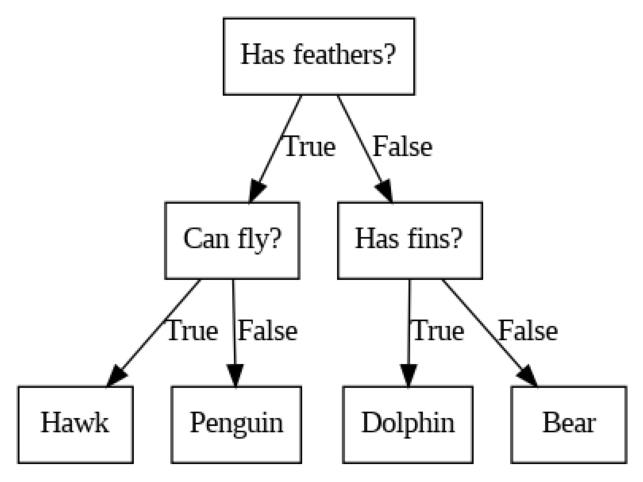

In [6]:
mglearn.plots.plot_animal_tree()

### 1.1 결정 트리 만들기

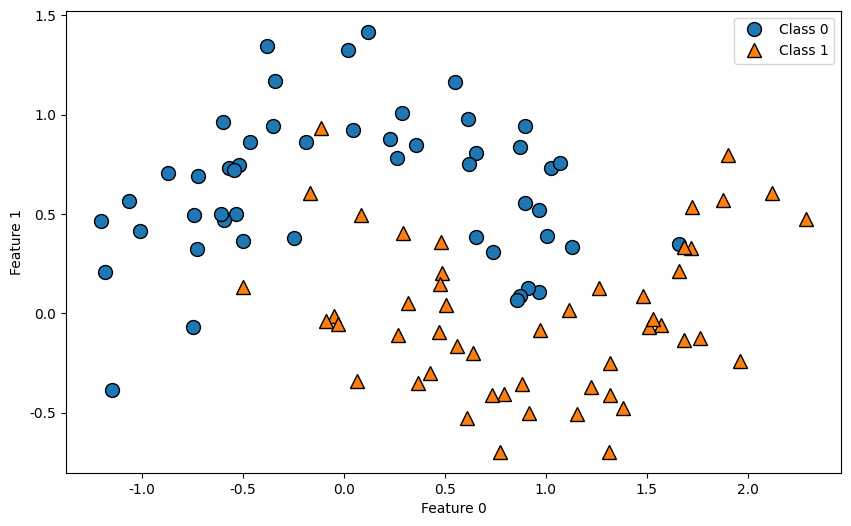

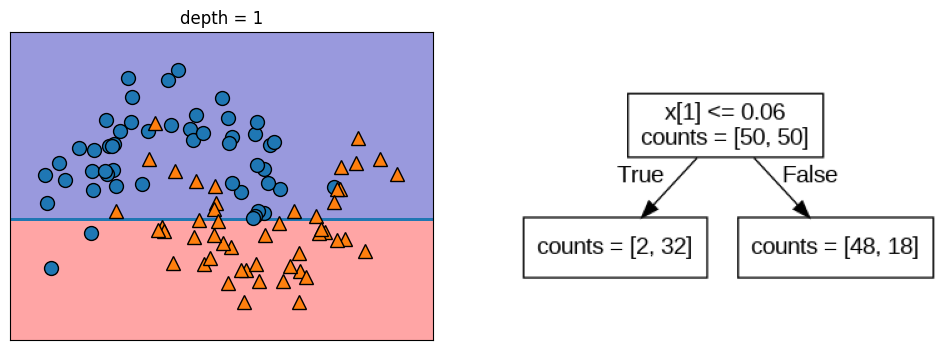

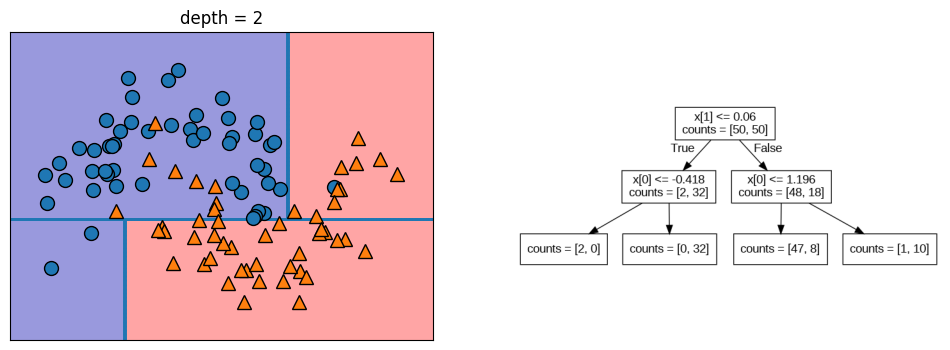

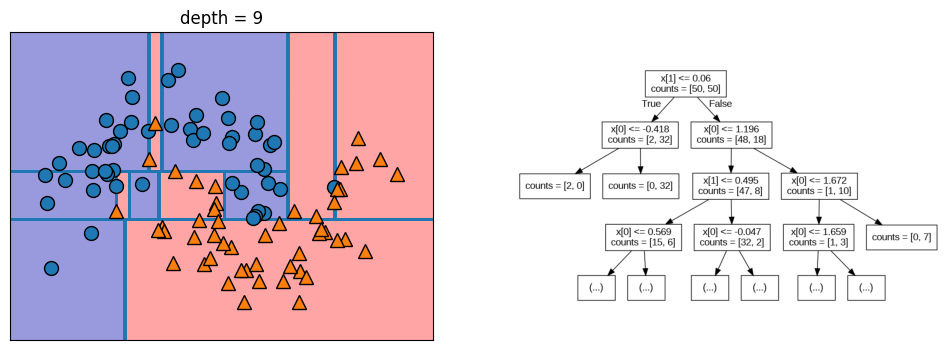

In [7]:
# 데이터 셋 - two_moons
mglearn.plots.plot_tree_progressive()

### 1.2 결정 트리 복잡도 제어 - Overfitting 방지

#### 1.2.1 max_depth 조절

In [8]:
# 데이터 로딩 및 데이터 분할
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    stratify=cancer.target,
                                                     random_state=123)

In [9]:
# 결정 트리 적용
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=123)
tree.fit(X_train, y_train)

print('훈련 세트 정확도: {:.3f}'.format(tree.score(X_train, y_train)))
print('테스트 세트 정확도: {:.3f}'.format(tree.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.923


In [10]:
# max_depth 조절
tree = DecisionTreeClassifier(max_depth=4, random_state=123)
tree.fit(X_train, y_train)

print('훈련 세트 정확도: {:.3f}'.format(tree.score(X_train, y_train)))
print('테스트 세트 정확도: {:.3f}'.format(tree.score(X_test, y_test)))

훈련 세트 정확도: 0.981
테스트 세트 정확도: 0.923


#### 1.2.2 min_samples_leaf 조절

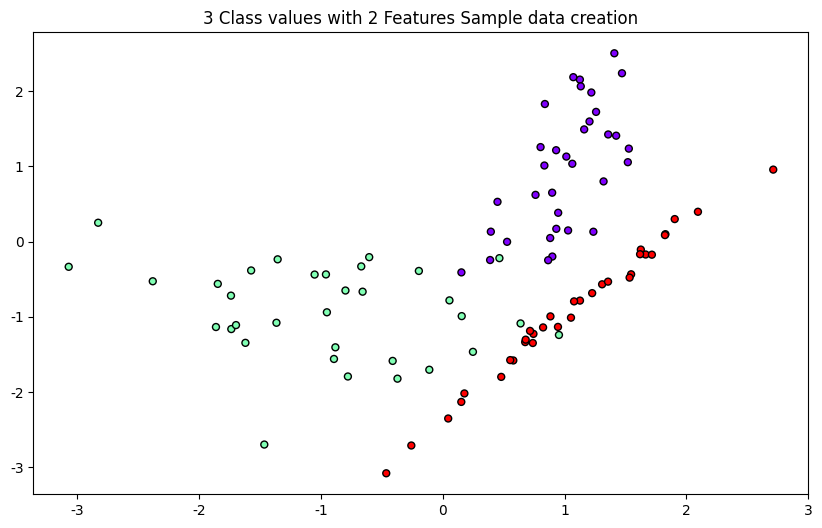

In [11]:
# 데이터 생성
from sklearn.datasets import make_classification

plt.title('3 Class values with 2 Features Sample data creation')

# 2차원 시각화를 위해서 feature는 2개, 결정값 클래스는 3가지 유형의 classification 샘플 데이터 생성.
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                                           n_classes=3, n_clusters_per_class=1, random_state=123)

# plot 형태로 2개의 feature로 2차원 좌표 시각화, 각 클래스값은 다른 색깔로 표시됨.
plt.scatter(X_features[:, 0], X_features[:, 1], marker='o',
            c=y_labels, s=25, cmap='rainbow', edgecolor='k')
plt.show()

In [12]:
# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig, ax = plt.subplots()

    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('on')
    xlim_start, xlim_end = ax.get_xlim()
    ylim_start, ylim_end = ax.get_ylim()

    # 호출 파라미터로 들어온 training 데이타로 model 학습 .
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행.
    xx, yy = np.meshgrid(np.linspace(xlim_start, xlim_end, num=200),
                        np.linspace(ylim_start, ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # contourf() 를 이용하여 class boundary 를 visualization 수행.
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes+1) - 0.5,
                           cmap='rainbow',
                           zorder=1)

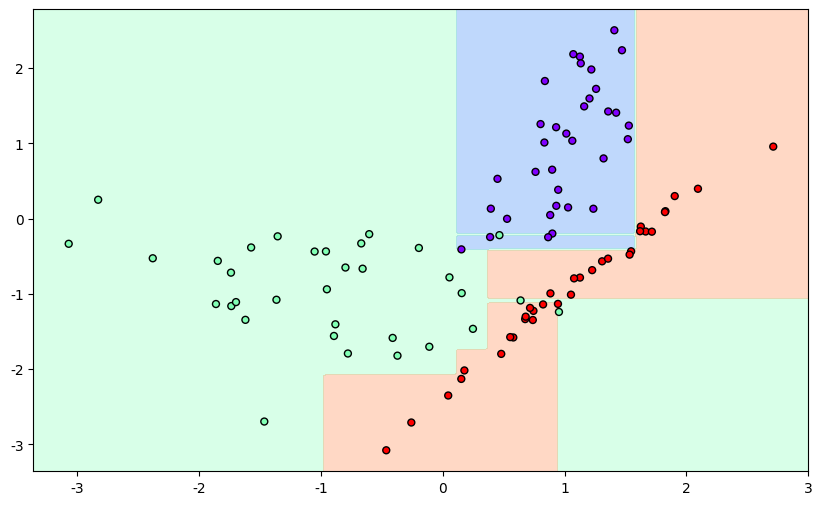

In [13]:
# 결정 트리 적용
from sklearn.tree import DecisionTreeClassifier

# 특정한 트리 생성 제약없는 결정 트리의 Decsion Boundary 시각화.
df_clf = DecisionTreeClassifier(random_state=123).fit(X_features, y_labels)
visualize_boundary(df_clf, X_features, y_labels)

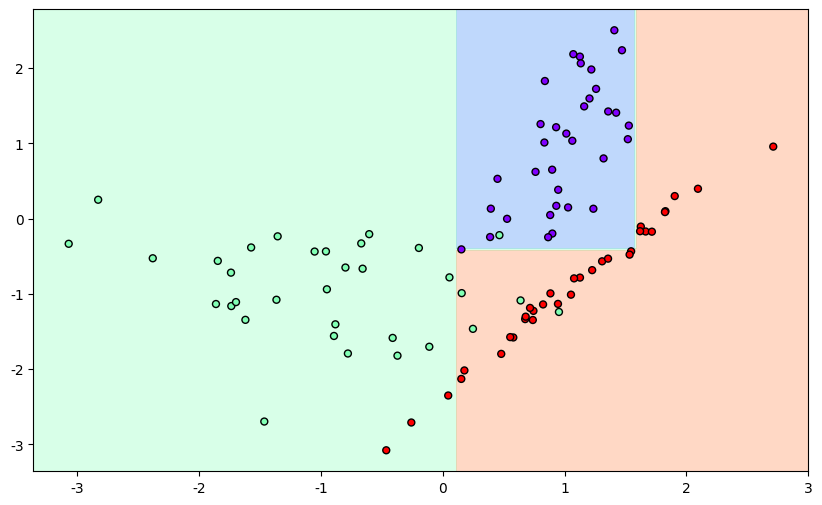

In [14]:
# min_samples_leaf=6 으로 조절
df_clf = DecisionTreeClassifier(min_samples_leaf=6, random_state=123).fit(X_features, y_labels)
visualize_boundary(df_clf, X_features, y_labels)

### 1.3 결정 트리 분석

#### 결정 트리 시각화

In [15]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file='/content/RaejungLecture-MachineLearning/Lecture/data/tree.dot',
                class_names=['악성', '양성'],
                feature_names=cancer.feature_names,
                impurity=False,
                filled=True)

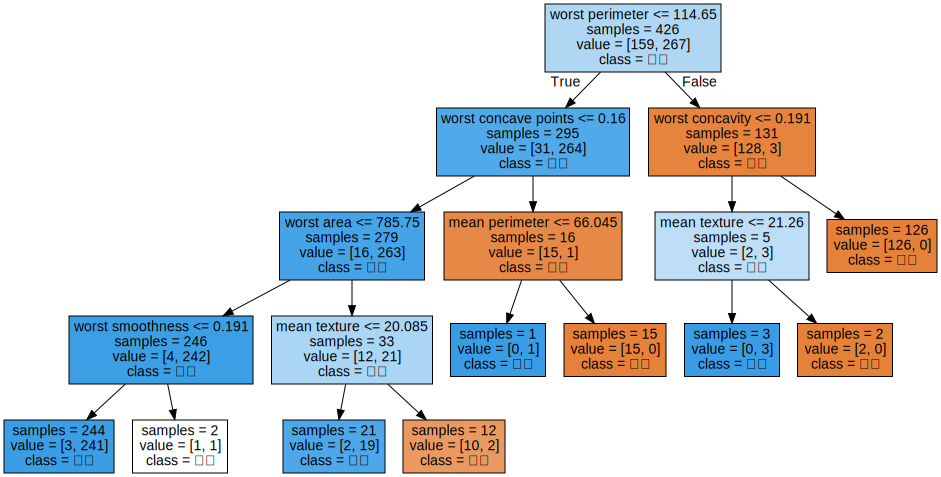

In [16]:
import graphviz

with open('/content/RaejungLecture-MachineLearning/Lecture/data/tree.dot', encoding='utf8') as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

/usr/local/lib/python3.11/dist-packages/sklearn/tree/_export.py:673: UserWarning: Glyph 50577 (\N{HANGUL SYLLABLE YANG}) missing from font(s) DejaVu Sans.
  ann.update_bbox_position_size(renderer)
/usr/local/lib/python3.11/dist-packages/sklearn/tree/_export.py:673: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  ann.update_bbox_position_size(renderer)
/usr/local/lib/python3.11/dist-packages/sklearn/tree/_export.py:673: UserWarning: Glyph 50501 (\N{HANGUL SYLLABLE AG}) missing from font(s) DejaVu Sans.
  ann.update_bbox_position_size(renderer)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50577 (\N{HANGUL SYLLABLE YANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/loca

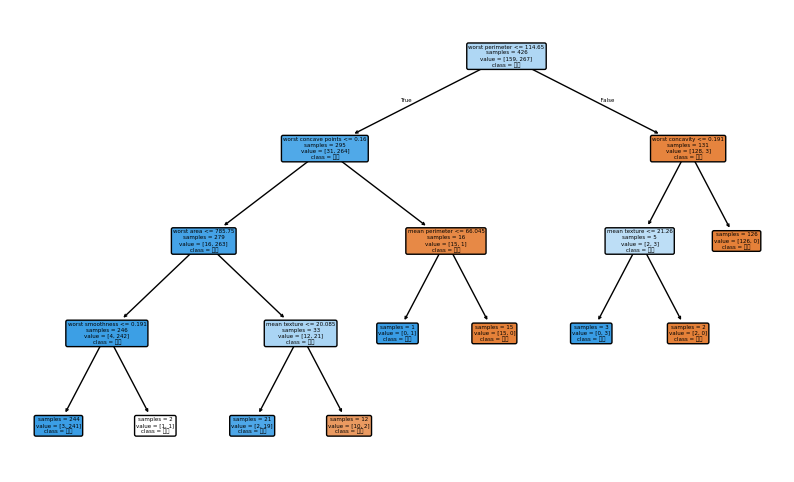

In [17]:
from sklearn.tree import plot_tree

plot_tree(tree, class_names=['악성', '양성'], feature_names=cancer.feature_names,
          impurity=False, filled=True, rounded=True, fontsize=4)
plt.show()

### 1.4 결정 트리의 특성 중요도

#### Feature Importance

In [18]:
print('Feature Importance', tree.feature_importances_)

Feature Importance [0.         0.05781305 0.01011156 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.744009   0.03786972
 0.00508916 0.         0.0186732  0.12643431 0.         0.        ]


In [19]:
cancer.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

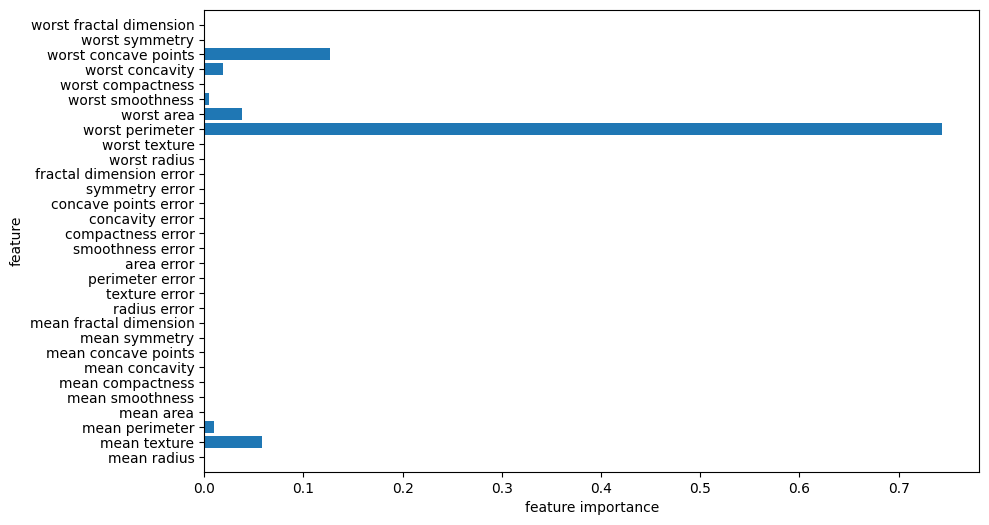

In [20]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel('feature importance')
    plt.ylabel('feature')
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)

Feature importances: [0. 1.]


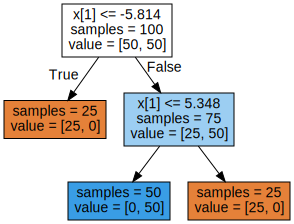

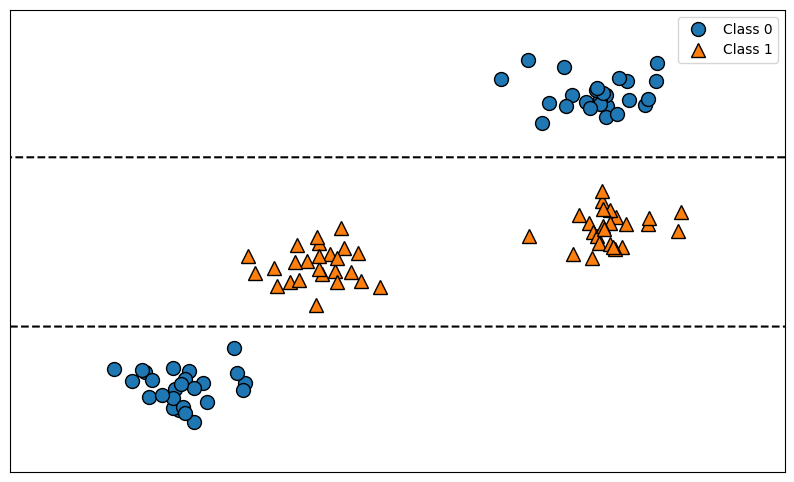

In [21]:
tree = mglearn.plots.plot_tree_not_monotone()
tree

### 1.5 결정 트리 & 선형 회귀 비교

#### (램 가격 동향(수치 예측), (결정 트리: 훈련 데이터 범위 밖의 데이터 예측 불가)

In [22]:
# 데이터 로딩
ram_prices = pd.read_csv('/content/RaejungLecture-MachineLearning/Lecture/data/ram_price.csv',
                         index_col=0)
ram_prices.head()

,date,price
0,1957.0,411041792.0
1,1959.0,67947725.0
2,1960.0,5242880.0
3,1965.0,2642412.0
4,1970.0,734003.0


In [23]:
print(ram_prices.shape)
ram_prices.info()

(333, 2)
<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 332
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    333 non-null    float64
 1   price   333 non-null    float64
dtypes: float64(2)
memory usage: 7.8 KB


# 108_앙상블

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import mglearn

plt.rc('figure', figsize=(10, 6))

from matplotlib import rcParams
rcParams['font.family'] = 'NanumBarunGothic'
rcParams['font.size'] = 10
rcParams['axes.unicode_minus'] = False

## 1.Ensenble

### 여러 개의 분류기(Classifier)를 생성하고 그 예측을 결합함으로써 보다 정확한 최종 예측을 수행
Overfitting 방지

## 2 Random Forest

### 회귀 결과 예측 방법: 노드의 값들을 평균
분류 결과 예측 방법: 범주의 갯수 카운팅

### 2.1 Random Forest 모델 생성

In [25]:
# 데이터 생성 & 데이터 분할
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y  = make_moons(n_samples=100, noise=0.25, random_state=123)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=123)

In [26]:
# 모댈 생성 및 학습 - Random Forest
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=5, random_state=123)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=123)

### 2.2 Random Forest 결정 경계 시각화

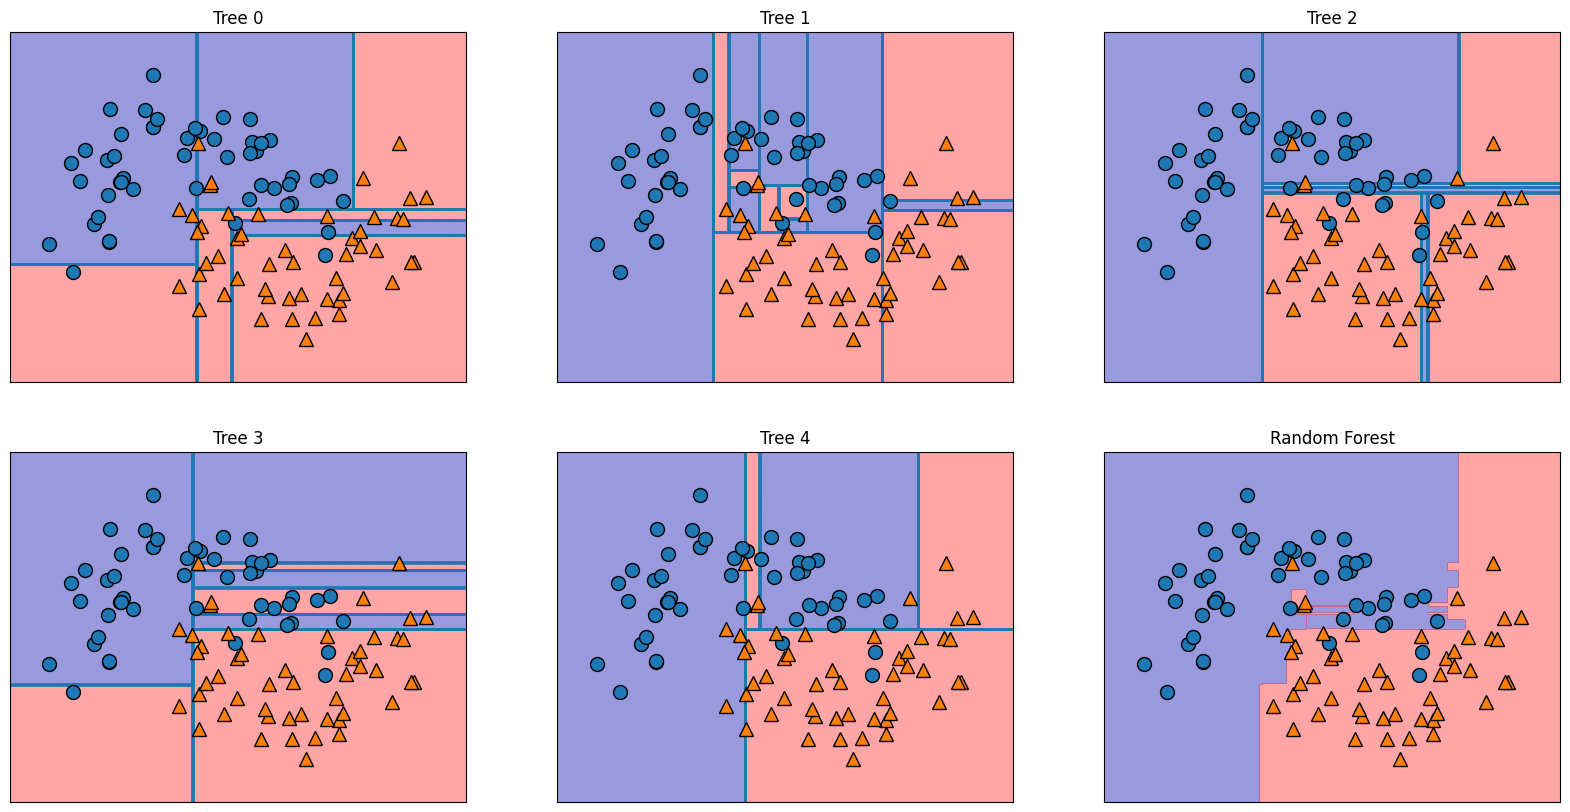

In [27]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title(f'Tree {i}')
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)

axes[-1, -1].set_title('Random Forest')
mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1, -1], alpha=0.4)

mglearn.discrete_scatter(X[:, 0], X[:, 1], y=y)

plt.show()

### 2.3 Feature Importance

In [28]:
# 데이터 생성 & 데이터 분할
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=123)

In [29]:
# 모댈 생성 및 학습 - Random Forest
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()
forest.fit(X_train, y_train)

print('training set accuracy: {:.3f}'.format(forest.score(X_train, y_train)))
print('test set accuracy: {:.3f}'.format(forest.score(X_test, y_test)))

training set accuracy: 1.000
test set accuracy: 0.993


In [30]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel('feature importance')
    plt.ylabel('feature')
    plt.ylim(-1, n_features)

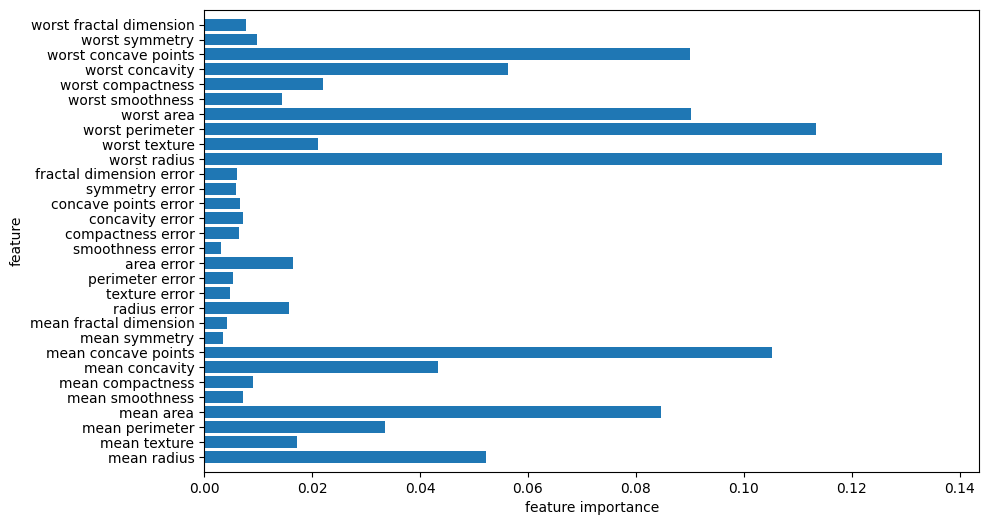

In [31]:
# Feature Importance
plot_feature_importances_cancer(forest)

## 3.GBM - Gradient Boosting Machine

#### 회귀: 잔차를 예측
#### 분류: logloss 예측

### GBM 적용

In [32]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=123)

In [33]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(random_state=123)
gbrt.fit(X_train, y_train)

print('training set accuracy: {:.3f}'.format(gbrt.score(X_train, y_train)))
print('test set accuracy: {:.3f}'.format(gbrt.score(X_test, y_test)))

training set accuracy: 1.000
test set accuracy: 0.979


### max_depth = 1

In [34]:
gbrt = GradientBoostingClassifier(random_state=123, max_depth=1)
gbrt.fit(X_train, y_train)

print('training set accuracy: {:.3f}'.format(gbrt.score(X_train, y_train)))
print('test set accuracy: {:.3f}'.format(gbrt.score(X_test, y_test)))

training set accuracy: 0.993
test set accuracy: 0.986


### 학습률 조정 - learning_rate = 0.01

In [35]:
gbrt = GradientBoostingClassifier(random_state=123, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print('training set accuracy: {:.3f}'.format(gbrt.score(X_train, y_train)))
print('test set accuracy: {:.3f}'.format(gbrt.score(X_test, y_test)))

training set accuracy: 0.991
test set accuracy: 0.972


### Feature Importance

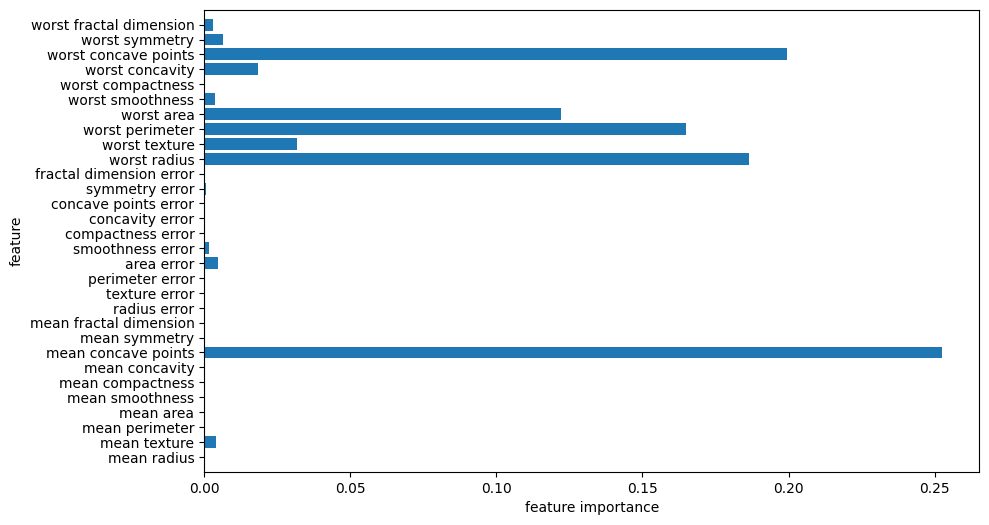

In [36]:
gbrt = GradientBoostingClassifier(random_state=123, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)

## 4 XGBoost - eXtra Gradient Boost

In [37]:
#!pip install xgboost
import xgboost
print(xgboost.__version__)

2.1.3


In [38]:
# 데이터 로딩: 위스콘신 Breast Cancer 데이터 셋
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

In [39]:
df = pd.DataFrame(data=X, columns=cancer.feature_names)
df['target'] = y
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [40]:
print(df.shape)
df.info()

(569, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error

In [41]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [42]:
cancer.target_names   # 악성, 양성

array(['malignant', 'benign'], dtype='<U9')

In [43]:
df['target'].value_counts()

,count
target,
1,357
0,212


In [44]:
# 데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(455, 30) (455,)
(114, 30) (114,)


In [45]:
# # XGBoost 모델 생성 및 학습 - early_stopping_rounds=100

# from xgboost import XGBClassifier

# evals = [(X_test, y_test)]

# xgb = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3, use_label_encoder=False)

# xgb.fit(X_train, y_train, early_stopping_rounds=100, eval_set=evals, eval_metric='logloss', verbose=True)

## 6.Ensenble - 수치 예측

In [46]:
# 데이터 로딩
df = pd.read_csv('/content/RaejungLecture-MachineLearning/Lecture/data/boston.csv')
X = df.drop('target', axis=1).values
y = df['target'].values
print(df.shape)
df.head()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

In [48]:
# 데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

### 6.1 Random Forest 적용

In [49]:
%%time
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=1000, random_state=123)

neg_mse_scores = cross_val_score(rf, X, y, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('cross-validation individual Negative MSE scores: ', np.round(neg_mse_scores, 2))
print('cross-validation individual RMSE scores: ', np.round(rmse_scores, 2))
print('cross-validation average RMSE: {0:.3f}'.format(avg_rmse))

cross-validation individual Negative MSE scores:  [ -7.89 -12.85 -20.06 -46.34 -18.59]
cross-validation individual RMSE scores:  [2.81 3.59 4.48 6.81 4.31]
cross-validation average RMSE: 4.398
CPU times: user 23.3 s, sys: 62.3 ms, total: 23.4 s
Wall time: 33.4 s


### 6.2 DT, GBM, XGBoost, LightGBM

In [50]:
# %%time
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import GradientBoostingRegressor
# from xgboost import XGBRegressor
# from lightgbm import LGBMRegressor

# dt_reg = DecisionTreeRegressor(max_depth=4, random_state=0)
# rf_reg = RandomForestRegressor(n_estimators=1000, random_state=0)
# gb_reg = GradientBoostingRegressor(n_estimators=1000, random_state=0)
# xgb_reg = XGBRegressor(n_estimators=1000)
# lgb_reg = LGBMRegressor(n_estimators=1000)

# # 트리 기반의 회귀 모델을 반복하면서 평가 수행
# models = [dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]

# for model in models:
#     neg_mse_scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
#     rmse_scores  = np.sqrt(-1 * neg_mse_scores)
#     avg_rmse = np.mean(rmse_scores)
#     print('##### ',model.__class__.__name__ , ' #####')
#     print('교차 검증의 평균 RMSE : {:.3f} '.format(avg_rmse))

# 109_차원축소

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import mglearn

plt.rc('figure', figsize=(10, 6))

from matplotlib import rcParams
rcParams['font.family'] = 'NanumBarunGothic'
rcParams['font.size'] = 10
rcParams['axes.unicode_minus'] = False

## 1.PCA(Principal Component Analysis) - 주성분 분석

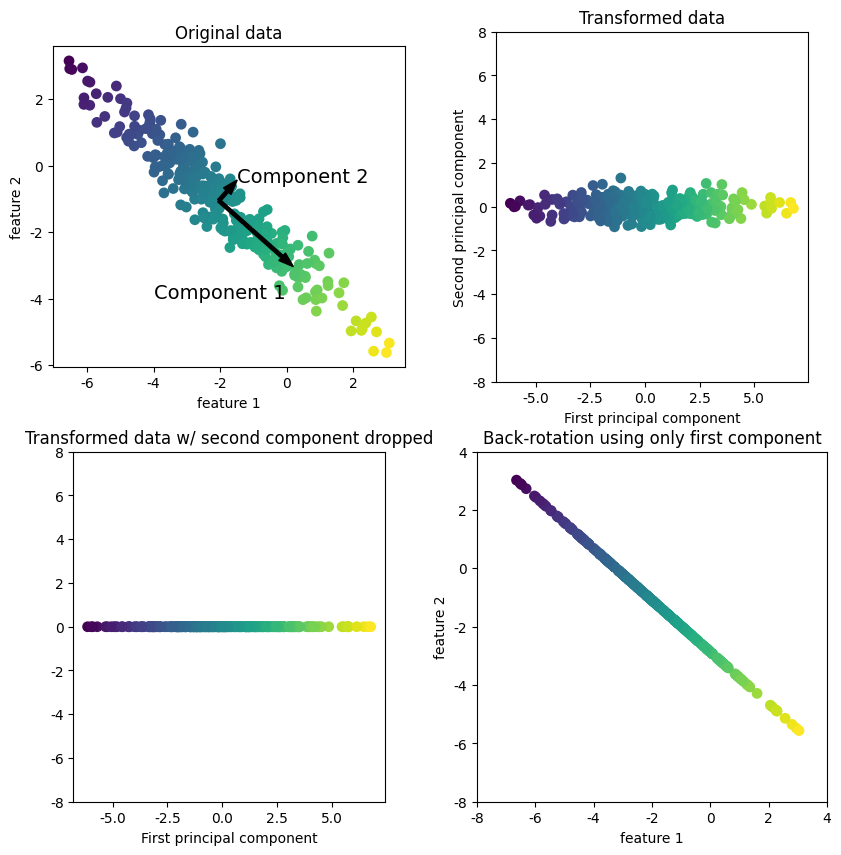

In [51]:
mglearn.plots.plot_pca_illustration()

### 1.1 PCA 적용 - 유방암 데이터 셋

#### 1.1.1 데이터 로딩 및 스케일링

In [53]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

cancer = load_breast_cancer()

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

#### 1.1.2 PCA 적용

In [54]:
from sklearn.decomposition import PCA

# PCA 모델 생성 - 주성분 2개
pca = PCA(n_components=2)

# 모델 학습(규칙 설정)
pca.fit(X_scaled)

# 데이터 변환(PCA 적용)
X_pca = pca.transform(X_scaled)

In [55]:
print('원본 데이터 형태:', X_scaled.shape)
print('PCA 적용된 데이터 형태:', X_pca.shape)

원본 데이터 형태: (569, 30)
PCA 적용된 데이터 형태: (569, 2)


##### 1.1.3 PCA 성분

In [56]:
pca.components_.shape

(2, 30)

In [57]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In [58]:
# 정보를 담고 있는 비율
pca.explained_variance_ratio_

array([0.44272026, 0.18971182])

#### 1.1.4 주성분 2개로 데이터 시각화

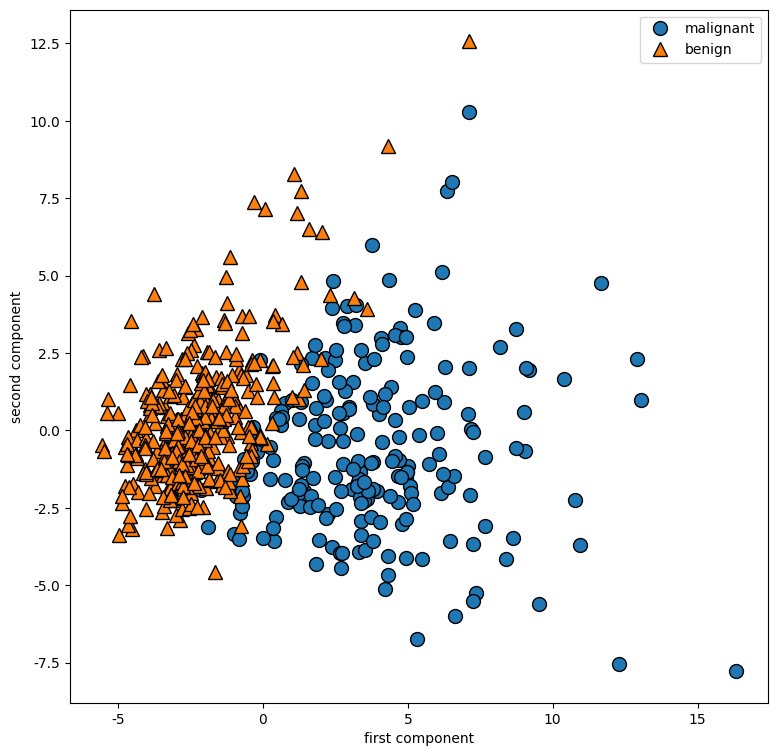

In [59]:
plt.figure(figsize=(9, 9))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)

plt.legend(['malignant', 'benign'], loc='best')

plt.xlabel('first component')
plt.ylabel('second component')
plt.show()

### 1.2 PCA 적용 - Iris 데이터 셋

#### 1.2.1 데이터 로딩

In [60]:
from sklearn.datasets import load_iris

iris = load_iris()

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [62]:
print(df['target'].unique())
print(df['target'].value_counts())

[0 1 2]
target
0    50
1    50
2    50
Name: count, dtype: int64


#### 1.2.2 데이터 시각화

AttributeError: module 'matplotlib.pyplot' has no attribute 'xlable'

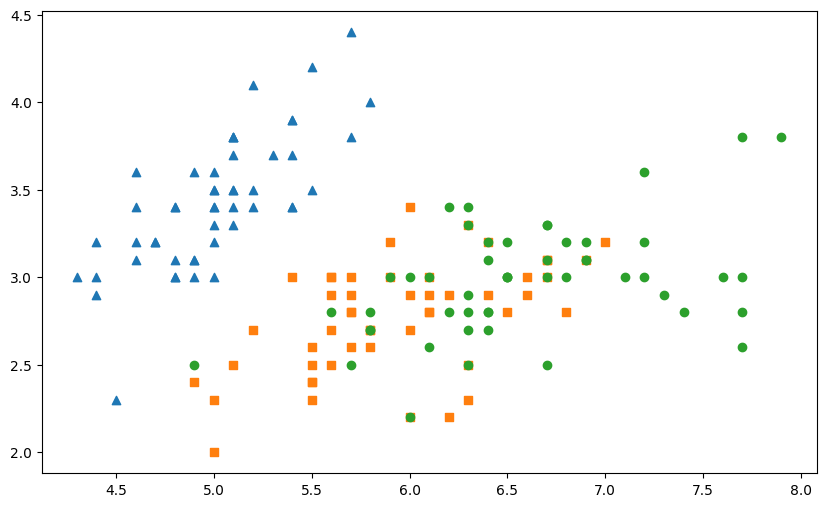

In [63]:
markers = ['^', 's', 'o']

for i, marker in enumerate(markers):
    x_axis_data = df[df['target']==i]['sepal length (cm)']
    y_axis_data = df[df['target']==i]['sepal width (cm)']

    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.xlable('sepal length')
plt.ylabel('sepal width')
plt.legend()
plt.show()

#### 1.2.3 데이터 스케일링

In [64]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris.data)

#### 1.2.4 PCA 적용

In [65]:
from sklearn.decomposition import PCA

# PCA 모델 생성 - 주성분 2개
pca = PCA(n_components=2)

# 모델 학습(규칙 설정)
pca.fit(iris_scaled)

# 데이터 변환(PCA 적용)
iris_pca = pca.transform(iris_scaled)

In [66]:
print('원본 데이터 형태:', iris_scaled.shape)
print('PCA 적용된 데이터 형태:', iris_pca.shape)

원본 데이터 형태: (150, 4)
PCA 적용된 데이터 형태: (150, 2)


#### 1.2.5 PCA 성분

In [67]:
pca.components_.shape

(2, 4)

In [68]:
pca.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199]])

#### 1.2.6 PCA 적용된 DataFrame 생성